In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

In [3]:
df_train=pd.read_csv('SalaryData_Train.csv')
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_test=pd.read_csv('SalaryData_Test.csv')
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
df=pd.concat([df_train,df_test])

In [7]:
df=pd.concat([df_train,df_test])

df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.shape

(45221, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [11]:
df.duplicated().any()

True

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(39239, 14)

In [14]:
df1=df.copy()
cols = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']
for x in cols:
    print(x,"\n",df1[x].value_counts())

workclass 
  Private             27716
 Self-emp-not-inc     3669
 Local-gov            2975
 State-gov            1892
 Self-emp-inc         1595
 Federal-gov          1371
 Without-pay            21
Name: workclass, dtype: int64
education 
  HS-grad         12003
 Some-college     8456
 Bachelors        6522
 Masters          2357
 Assoc-voc        1859
 Assoc-acdm       1470
 11th             1422
 10th             1136
 7th-8th           801
 Prof-school       764
 9th               658
 12th              540
 Doctorate         526
 5th-6th           438
 1st-4th           217
 Preschool          70
Name: education, dtype: int64
maritalstatus 
  Married-civ-spouse       17947
 Never-married            12168
 Divorced                  5885
 Separated                 1394
 Widowed                   1261
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
occupation 
  Prof-specialty       5516
 Exec-managerial      5311
 Adm-clerical     

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
for x in cols:
    df1[x]=le.fit_transform(df1[x])
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [18]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [19]:
df1.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000
mean,39.309412,2.228752,10.212824,10.136293,2.568618,6.076098,1.451566,3.638931,0.665078,1253.346186,101.207727,41.206121,35.202936,0.254211
std,13.298159,1.010177,3.882256,2.637228,1.538130,4.019794,1.618028,0.877948,0.471969,7994.096625,431.309171,12.458178,6.324275,0.435423
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,2.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,38.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,48.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,1.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,1.000000


age 



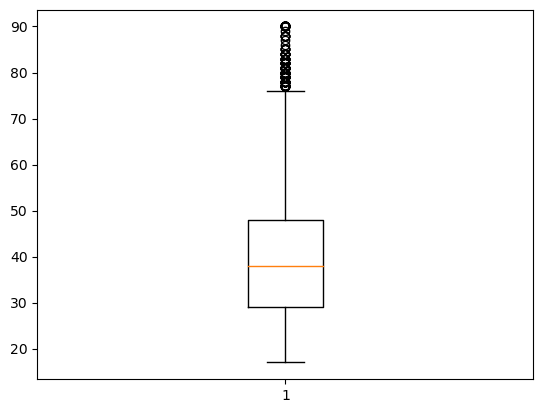

capitalgain 



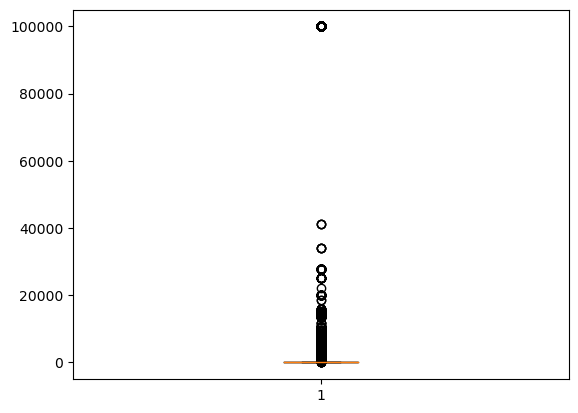

capitalloss 



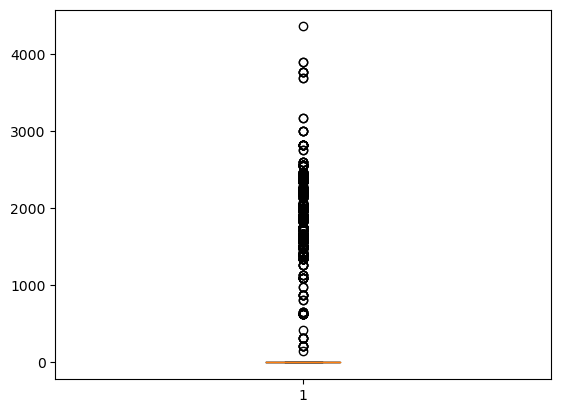

hoursperweek 



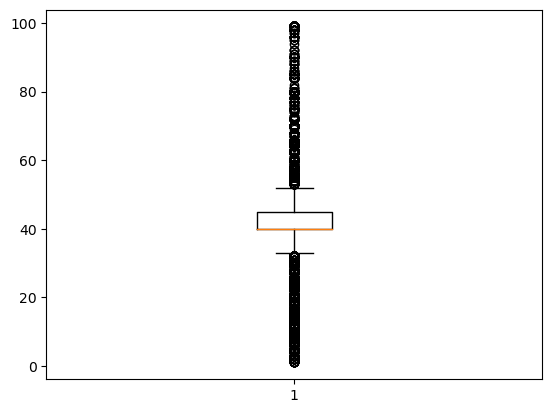

In [58]:
import matplotlib.pyplot as plt
int_cols=['age','capitalgain','capitalloss','hoursperweek']
for x in int_cols:
    print(x,"\n")
    plt.boxplot(df1[x])
    plt.show()

In [20]:
df1.shape

(39239, 14)

In [21]:
# finding IQR value
df2=df1.copy()
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age              19.0
workclass         0.0
education         3.0
educationno       4.0
maritalstatus     2.0
occupation        6.0
relationship      3.0
race              0.0
sex               1.0
capitalgain       0.0
capitalloss       0.0
hoursperweek      5.0
native            0.0
Salary            1.0
dtype: float64


In [22]:
df2=df1.copy()

In [23]:
# filtering
df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
df3.shape

(11388, 14)

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_7376\1120556108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[x])


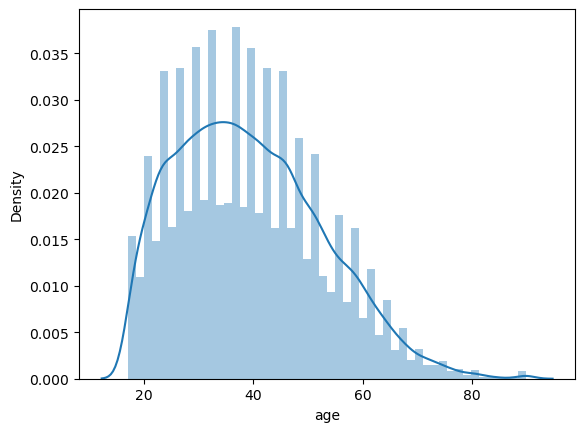

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_7376\1120556108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[x])


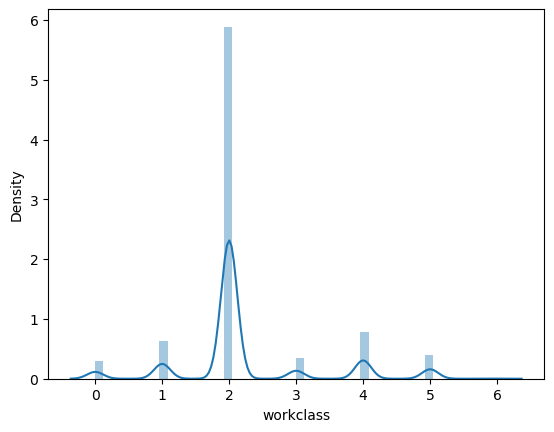

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_7376\1120556108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[x])


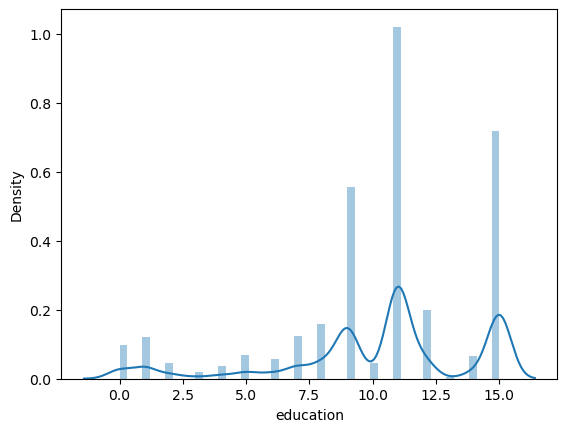

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_7376\1120556108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[x])


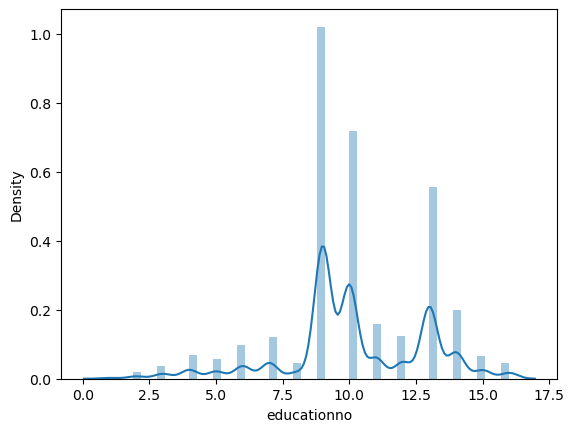

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_7376\1120556108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[x])


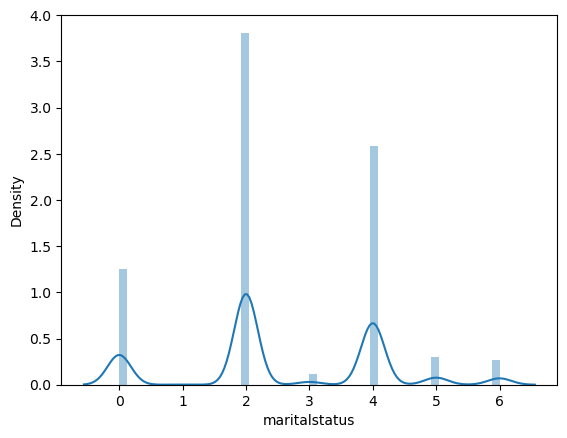

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_7376\1120556108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[x])


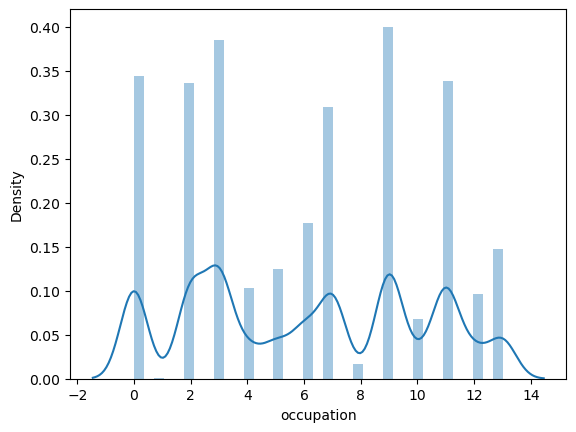

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_7376\1120556108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[x])


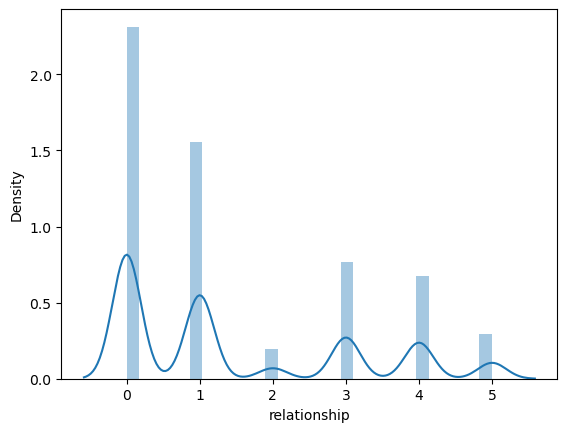

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_7376\1120556108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[x])


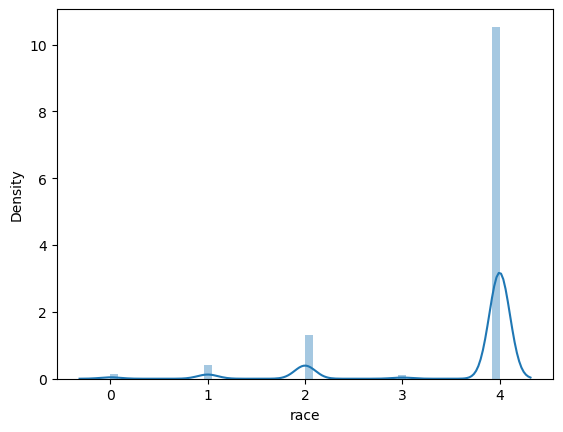

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_7376\1120556108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[x])


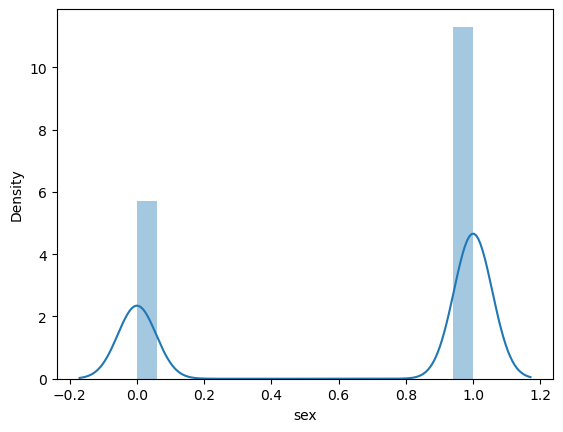

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_7376\1120556108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[x])


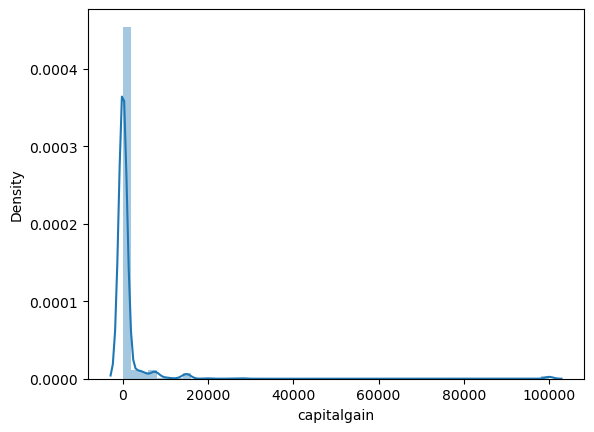

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_7376\1120556108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[x])


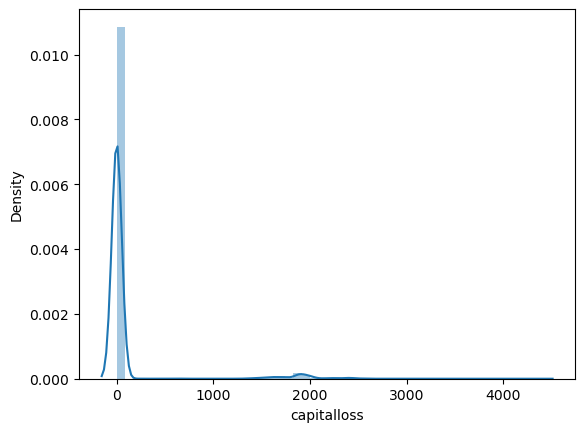

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_7376\1120556108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[x])


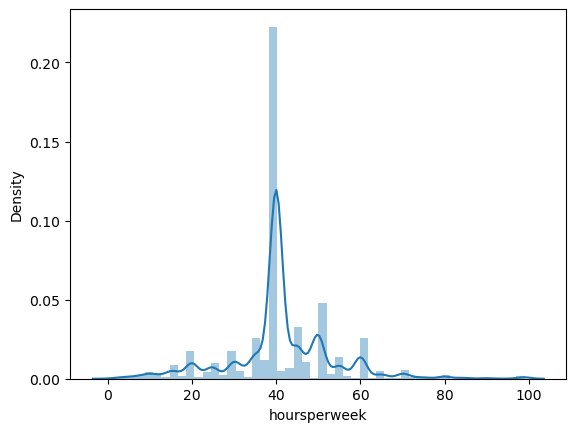

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_7376\1120556108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[x])


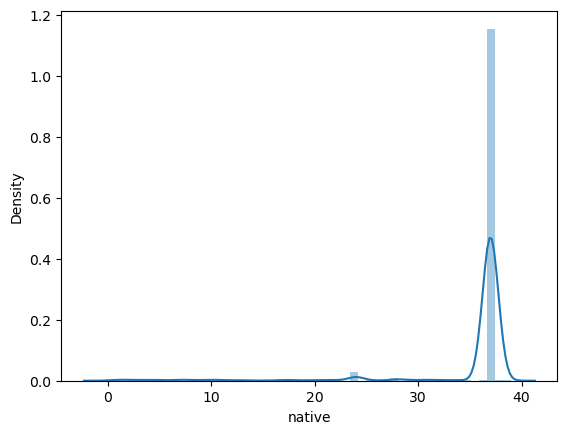

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_7376\1120556108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[x])


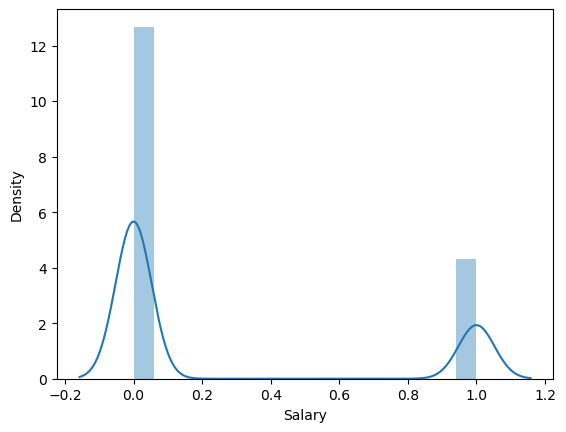

In [59]:
import seaborn as sns
for x in df3.columns:
    sns.distplot(df2[x])
    plt.show()

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca=PCA(n_components=2)

In [70]:
X=df2.drop('Salary',axis=1)
X.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4


In [71]:
scalar=RobustScaler()

In [72]:
Scaled_data=pd.DataFrame(scalar.fit_transform(X))

In [73]:
pca_data=pd.DataFrame(pca.fit_transform(Scaled_data))

In [74]:
pca_data

,0,1
0,920.853497,-99.374317
1,-1253.142328,-103.703751
2,-1253.142204,-103.702188
3,-1253.142231,-103.702609
4,-1253.142555,-103.709805
...,...,...
39234,-1253.142189,-103.701954
39235,-1253.142209,-103.702299
39236,-1253.142220,-103.702398
39237,4201.846981,-92.842791


In [78]:
y=df2['Salary']

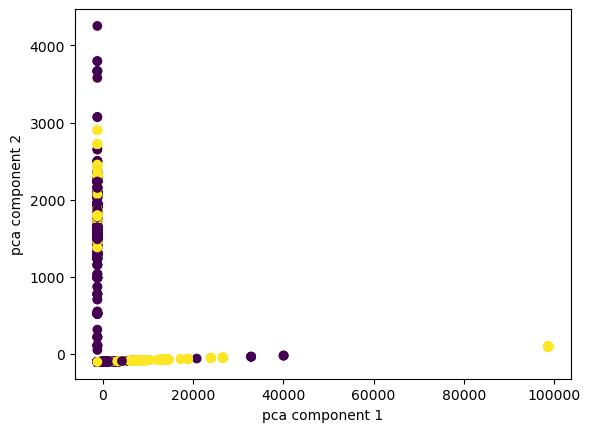

In [79]:
plt.scatter(pca_data.iloc[:,0],pca_data.iloc[:,1],c=y)
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')
plt.show()

MemoryError: Unable to allocate 123. GiB for an array with shape (16560950027,) and data type float64

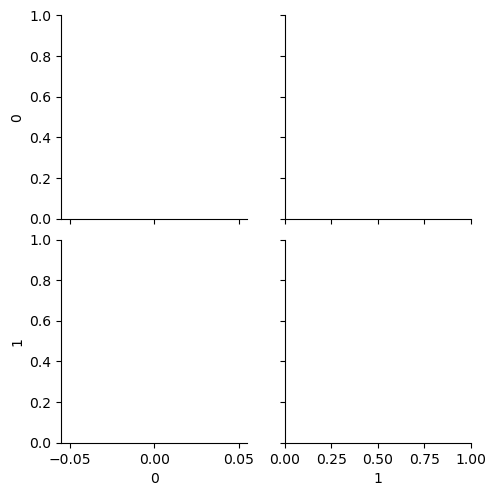

In [102]:
import seaborn as sns
sns.pairplot(pca_data)

In [81]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test =train_test_split( pca_data, y, test_size=0.20, random_state=42)

In [93]:
from sklearn.naive_bayes import GaussianNB

In [94]:
model=GaussianNB()

In [95]:
model.fit(X_train,y_train)

GaussianNB()

In [96]:
model.score(X_test,y_test)## testing accuracy

0.7854230377166157

In [97]:
y_pred=model.predict(X_test)

In [98]:
y_pr=model.predict(X_train)
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_train,y_pr)
## training accuracy

0.7840145264566277

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      5884
           1       0.64      0.33      0.43      1964

    accuracy                           0.79      7848
   macro avg       0.72      0.63      0.65      7848
weighted avg       0.76      0.79      0.76      7848



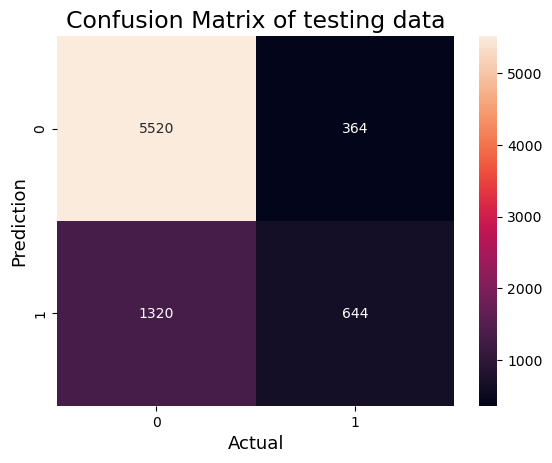

In [100]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix of testing data',fontsize=17)
plt.show()

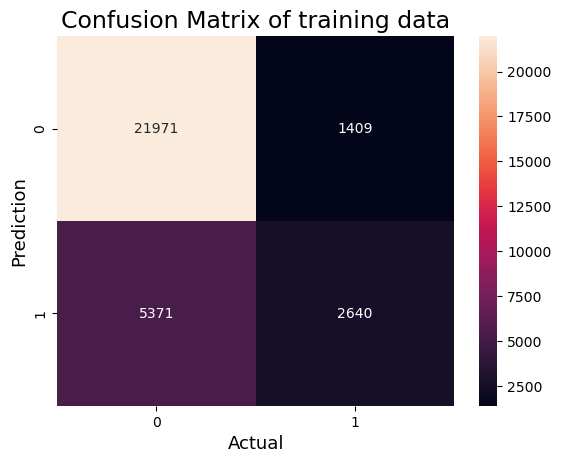

In [101]:
cm_ac=confusion_matrix(y_train,y_pr)
sns.heatmap(cm_ac,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix of training data',fontsize=17)
plt.show()